### Проектная работа по модулю “Математика и статистика в Python”

1. Загрузить файл hr.csv.

2. Рассчитать основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение).

3. Рассчитать и визуализировать корреляционную матрицу для переменных.

4. Визуализировать несколько взаимосвязей между переменными.

5. С использованием t-test статистики проверить взаимосвязи между несколькими переменными.

6. Рассчитать сколько работников работает в каждом департаменте.

7. Показать распределение сотрудников по зарплатам.

8. Показать распределение сотрудников по зарплатам совместно с департаментами.

9. Сколько сотрудников покинули компанию.

10. Проверить несколько гипотез для данных,чтобы понять почему сотрудники покидают компанию.

11. Загрузить результат (в формате .ipynbноутбука) в репозиторий. Разместить ссылку на репозиторийв лкна сайте

In [1]:
import numpy as np
import random
from matplotlib import pyplot as plt
%matplotlib inline
import pandas as pd
from scipy import stats
import seaborn as sns

In [2]:
hr = pd.read_csv('HR.csv')

Познакомимся с датафреймом.

In [3]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [4]:
hr.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


Рaссчитаем основные статистики. Не будем усложнять себе жизнь и воспользуемся пандосовским методом describe.

In [5]:
hr.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


Вот описание переменных: 
- satisfaction_level - уровень удовлетворенности работой
- last_evaluation - уровень последней оценки работы
- number_project -количество проектов
- average_montly_hours - среднее количество часов в месяц работы
- time_spend_company - шкала от 2 до 10, отражающее время работы в компании
- Work_accident - наличие инцидента на рабочем месте
- left - ушел ли работник или нет
- promotion_last_5years - факт повышения в течение 5 лет
- sales - департамент работника
- salary - уровень зарплаты

Создадим корреляционную матрицу и визуализируем её с помощью heatmap

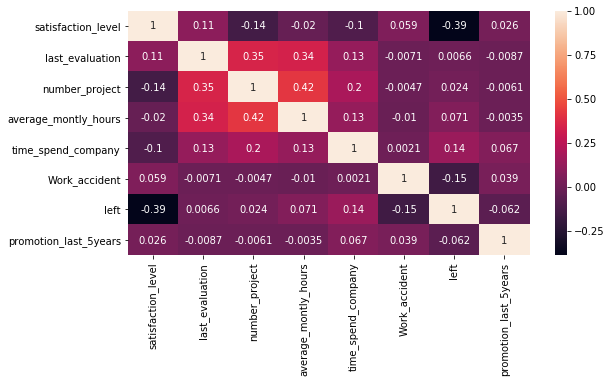

In [6]:
hr_corr = hr.corr()
plt.figure(figsize=(9,4.5))
sns.heatmap(hr_corr, annot=True)

С помощью библиотеки seaborn визуализируем взаимосвязи переменных

/home/data/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/data/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/data/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/home/data/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


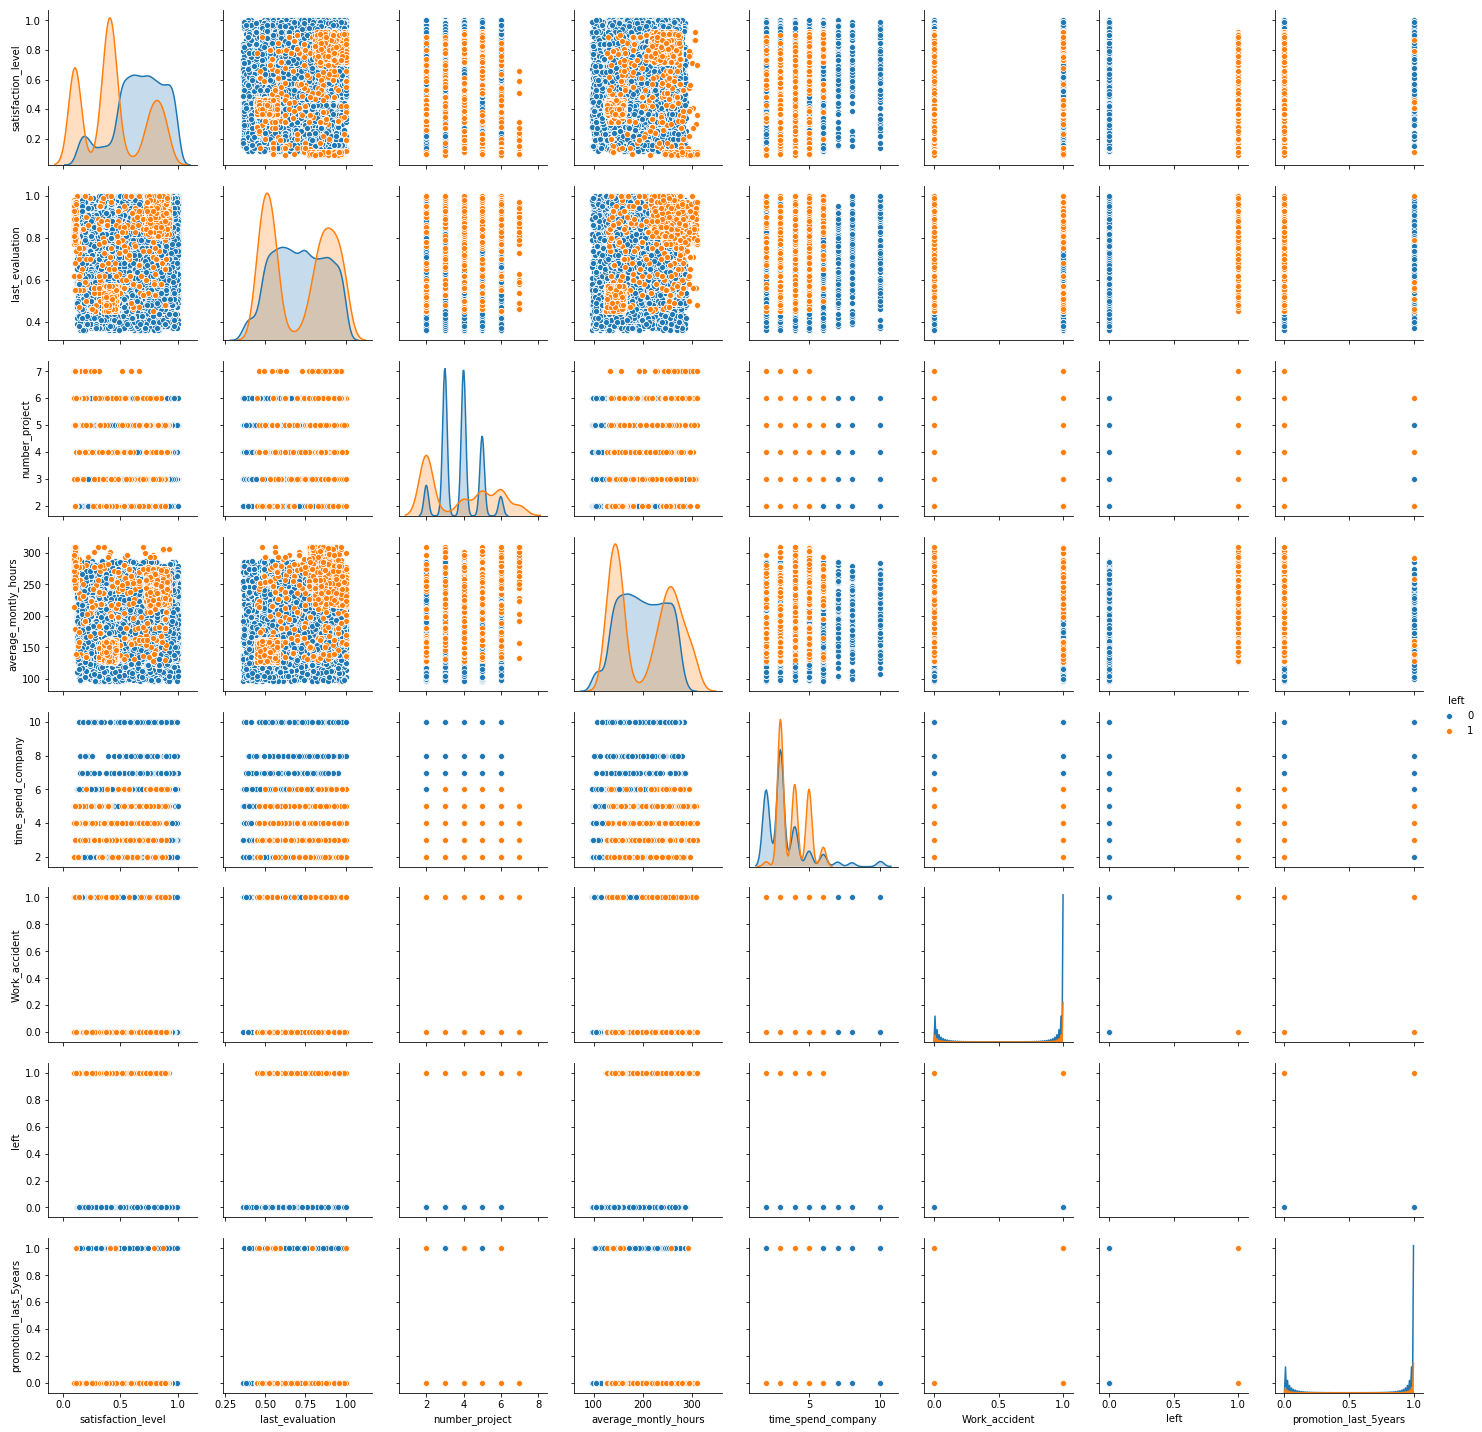

In [7]:
sns.pairplot(hr, hue='left')

Да...pairplot совсем неинформативный получился. Плюс у нас выпали категориальные переменные sales и salary. Позже мы к ним вернемся и визуализируем. 

Наблюдаем интересные бимодальные распределения среди уволившихся.
Например, распределение average_montly_hours говорит о том, что у нас увольняется много part-time сотрудников.

А сейчас попробуем сделать выборку по ключевому показателю left и прогнать их через t-test. 

Логика такая: если мы группируем данные по одному критерию, делаем t-test и наблюдаем значимые различия среднего, значит нам стоит обратить внимание на эти переменные в дальнейшем анализе.

In [8]:
hr['left'].value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [22]:
# Делим датафрейм на уволившихся и нет
left_1 = hr[hr['left'] == 1]
left_0 = hr[hr['left'] == 0]

# Выбираем интересные нам колонки
columns_for_test = ['satisfaction_level',
                    'last_evaluation',
                    'number_project',
                    'average_montly_hours',
                    'time_spend_company',
                    'Work_accident',
                    'promotion_last_5years']

# Делаем случайные выборки из каждой круппы по 200
left_1 = left_1[columns_for_test].sample(n=200, random_state=5)
left_0 = left_0[columns_for_test].sample(n=200, random_state=5)

In [23]:
# Делаем t-test на равенство средних уволившихся и оставшихся. Так для каждой колонки. Выводим результат.
for column in columns_for_test:
    if stats.ttest_ind(left_1[column], left_0[column]).pvalue < 0.5:
        print('>>> Mean values are different with p > 0.05 for {}'.format(column))
    else:
        print('Mean values are equal with p < 0.05 for {}'.format(column))

>>> Mean values are different with p > 0.05 for satisfaction_level
>>> Mean values are different with p > 0.05 for last_evaluation
Mean values are equal with p < 0.05 for number_project
>>> Mean values are different with p > 0.05 for average_montly_hours
>>> Mean values are different with p > 0.05 for time_spend_company
>>> Mean values are different with p > 0.05 for Work_accident
>>> Mean values are different with p > 0.05 for promotion_last_5years


Мы провели попарный t-test на выборках по 200. И можем смело игнорировать переменную number_project, так как она оказывают незначительное влияние на нашу целевую переменную и вряд ли помогут нам с выводами.

Узнаем сколько сотрудников работает в каждом из отделов.

In [26]:
hr[hr['left']==0].groupby(by='sales').size().reset_index(name='counts')

,sales,counts
0,IT,954
1,RandD,666
2,accounting,563
3,hr,524
4,management,539
5,marketing,655
6,product_mng,704
7,sales,3126
8,support,1674
9,technical,2023


Изучим как распределяются сотрудники по уровню зарплаты

In [12]:
hr.groupby(by='salary').size().reindex(['low', 'medium', 'high']).reset_index(name='counts')

,salary,counts
0,low,7316
1,medium,6446
2,high,1237


Построим пару сводных таблиц:
- Распределение зарплат по отделам
- Количество увольнений сотрудников в разрезе зарплат и отделов

Отобразим сводные на тепловых картах.

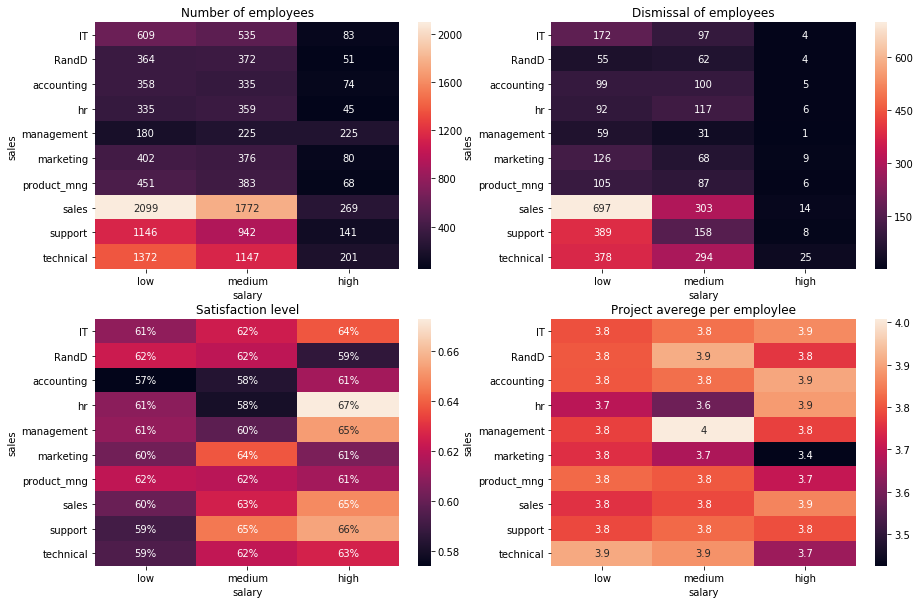

In [13]:
hr_count_pivot = pd.pivot_table(hr, values='satisfaction_level', index='sales', columns='salary', aggfunc=len)\
    .reindex(['low', 'medium', 'high'], axis=1)

hr_left_pivot = pd.pivot_table(hr, values='left', index='sales', columns='salary', aggfunc=sum)\
    .reindex(['low', 'medium', 'high'], axis=1)

hr_satisfy_pivot = pd.pivot_table(hr, values='satisfaction_level', index='sales', columns='salary', aggfunc=np.mean)\
    .reindex(['low', 'medium', 'high'], axis=1)

hr_project_pivot = pd.pivot_table(hr, values='number_project', index='sales', columns='salary', aggfunc=np.mean)\
    .reindex(['low', 'medium', 'high'], axis=1)

fig, ax = plt.subplots(2,2, figsize=(15,10))

ax[0][0].title.set_text('Number of employees')
sns.heatmap(hr_count_pivot, annot=True, fmt='.0f', ax=ax[0][0])

ax[0][1].title.set_text('Dismissal of employees')
sns.heatmap(hr_left_pivot, annot=True, fmt='.0f', ax=ax[0][1])

ax[1][0].title.set_text('Satisfaction level')
sns.heatmap(hr_satisfy_pivot, annot=True, fmt='.0%', ax=ax[1][0])

ax[1][1].title.set_text('Project averege per employlee')
sns.heatmap(hr_project_pivot, annot=True, ax=ax[1][1])

plt.show()

Наблюдаем высокую "текучку" в отделах sales, support и technical. Ожидаемо, что чаще увольняются сотрудники с низкой зарплатой.

Сопоставим эти данные с двумя нижними картами. У сотрудников из продаж с низкой зарплатой, средняя загруженность и среднее значение удовлетворенности работой.

Забавно, что высокооплачиваемые кадровики так довольны работой при загруженности проектами выше среднего.

Визуализируем также коэффициент увольнений (уволившиеся / всего сотрудников) и оценку работы сотрудников

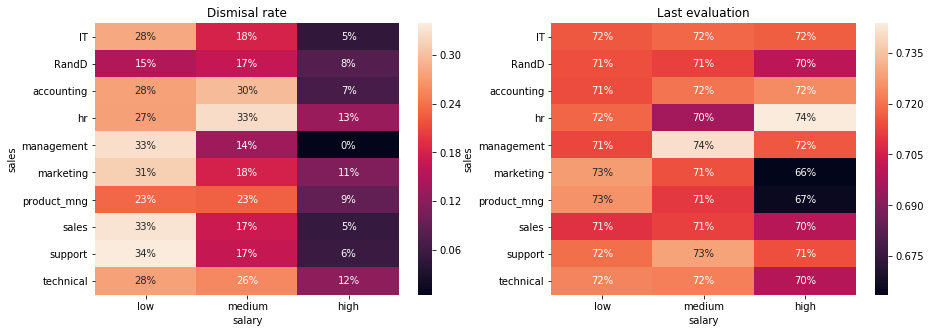

In [14]:
hr_evaluation_pivot = pd.pivot_table(hr, values='last_evaluation', index='sales', columns='salary', aggfunc=np.mean)\
    .reindex(['low', 'medium', 'high'], axis=1)

hr_leftrate = hr_left_pivot / hr_count_pivot
hr_evdelta = hr_satisfy_pivot - hr_evaluation_pivot

fig, ax = plt.subplots(1,2, figsize=(15,5))

ax[0].title.set_text('Dismisal rate')
sns.heatmap(hr_leftrate, annot=True, fmt='.0%', ax=ax[0])

ax[1].title.set_text('Last evaluation')
sns.heatmap(hr_evaluation_pivot, annot=True, fmt='.0%', ax=ax[1])

Не удивительно, что топ-менеджмент не склонен к увольнениям :)

Что-то мне подсказывает, что прошли какие-то серьезные изменения в топ менеджменте компании, что резко повлияло на уровень удовлетворенности сотрудников. Те, кому нечего терять: низкооплачиваемые сейлзы и поддержка, решили "покинуть корабль" первыми. За ними следом менеджмент, маркетинг и hr среднего уровня. Также можно предположить, что новоиспеченное руководство запустило реформы и начало увольнение неэффективных сотрудников (иначе объяснить высокую текучку hr среднего звена я не могу)

Что еще интересно, так это то, что сотрудники в компании крайне редко повышаются по службе.

Продолжим изучать данные.

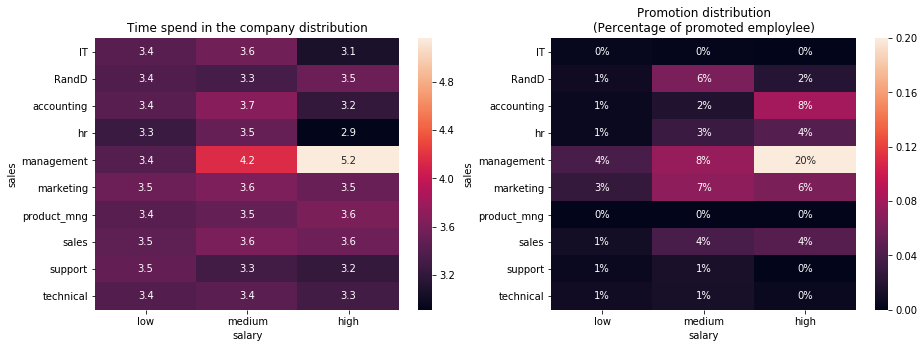

In [15]:
hr_spendtime_pivot = pd.pivot_table(hr, values='time_spend_company', index='sales', columns='salary', aggfunc=np.mean)\
    .reindex(['low', 'medium', 'high'], axis=1)

hr_promotion_pivot = pd.pivot_table(hr, values='promotion_last_5years', index='sales', columns='salary', aggfunc=sum)\
    .reindex(['low', 'medium', 'high'], axis=1)

hr_promotions = hr_promotion_pivot / hr_count_pivot

fig, ax = plt.subplots(1,2, figsize=(15,5))

ax[0].title.set_text('Time spend in the company distribution')
sns.heatmap(hr_spendtime_pivot, annot=True, ax=ax[0])

ax[1].title.set_text('Promotion distribution\n(Percentage of promoted employlee)')
sns.heatmap(hr_promotions, annot=True, fmt='.0%', ax=ax[1])

Интересно наблюдать, что сотрудники отделов с самой высокой текучкой почти не растут, хотя распределение времени работы в компании примерно одинаковое по всем отделам. Важно отметить, что это касается всех эшелонов зарплат в компании. ТАкже не стоит забывать, что эти отделы имеют низкий уровень удовлетворенности и высокий уровень качества работы. Лучше всего растут сотрудники отдела маркетинга и менеджмент.

### Гипотезы

1. Сотрудники высоконагруженных отделов (продажи и поддержка) с низким уровнем удовлетворенности работой и высоким уровнем качества не повышаются в должности. Это негативно сказывается на мотивации сотрудников. Ведь в этих отделах и так высокая "текучка". В тоже время менеджмент и маркетинг повышается хорошо (в среднем 4% сотрудников к 1% в продажах и поддержке). Эта несправедливость и побуждает сотрудников продаж и поддержки уходить из компании.

2. В компании сменилось руководство (высокооплачиваемый менеджмент). Отделы с высокой текучкой не довольны управлением и склонны увольняться.

Создам 4 датафрейма и визуализирую их на scatter plot и box plot:
1. Низкооплачиваемые Sales & Support уволившиеся (low_ss)
2. Низкооплачиваемые Sales & Support оставшиеся
3. Низкооплачиваемые Marketing & Management уволившиеся (low_mm)
4. Низкооплачиваемые Marketing & Management оставшиеся

Построю диаграммы рассеяния и боксплоты для ключевых, намой взгляд, параметров:
1. satisfaction_level & last_evaluation
2. time_spend_company & promotion_last_5years

In [16]:
low_ss = hr[((hr['sales'] == 'sales') | (hr['sales'] == 'support')) & (hr['salary'] == 'low')]
low_mm = hr[((hr['sales'] == 'management') | (hr['sales'] == 'marketing')) & (hr['salary'] == 'low')]

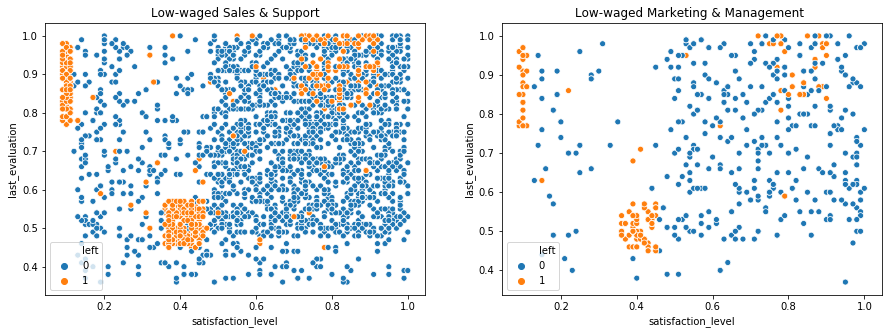

In [17]:
fig, ax = plt.subplots(1,2, figsize=(15,5))

ax[0].title.set_text('Low-waged Sales & Support')
sns.scatterplot(x=low_ss['satisfaction_level'], y=low_ss['last_evaluation'], hue=low_ss['left'], ax=ax[0])

ax[1].title.set_text('Low-waged Marketing & Management ')
sns.scatterplot(x=low_mm['satisfaction_level'], y=low_mm['last_evaluation'], hue=low_mm['left'], ax=ax[1])

plt.show()

Отлично, отчетливо наблюдаем три кластера среди увольняющихся. Меня немного смущает их квардартная форма, скорее всего есть еще несколько "важных переменных" влияющих на решение об увольнении. Либо данные синтетические.

Также наблюдаю левый верхний кластер, который может быть сформирован из работников, уровень удовлетворенности которых замерялся накануне увольнения.

Получившиеся три кластера я бы охарактеризовал так:
1. Левый верхний - профессиональные и возмущенные
2. Правый верхний - профессионалы-тихони
3. Средний нижний - середнячки (раюботают так себе и не жалуются)

С помощью попарного t-test проверим, действительно ли есть различия в продвижении между нашими отделами.

In [18]:
p_promo = stats.ttest_ind(low_ss['promotion_last_5years'].sample(n=len(low_mm), random_state=5), low_mm['promotion_last_5years']).pvalue
print('Нулевую гипотезу не отвергаем, т.к получили p-value = {}'.format(round(p_promo, 2)))

Нулевую гипотезу не отвергаем, т.к получили p-value = 0.01


Гипотеза о том, что низкооплачиваемые эшелоны маркетинга и менеджмента продвигают лучше пошатнулась.
Продолжаем исследовать данные.

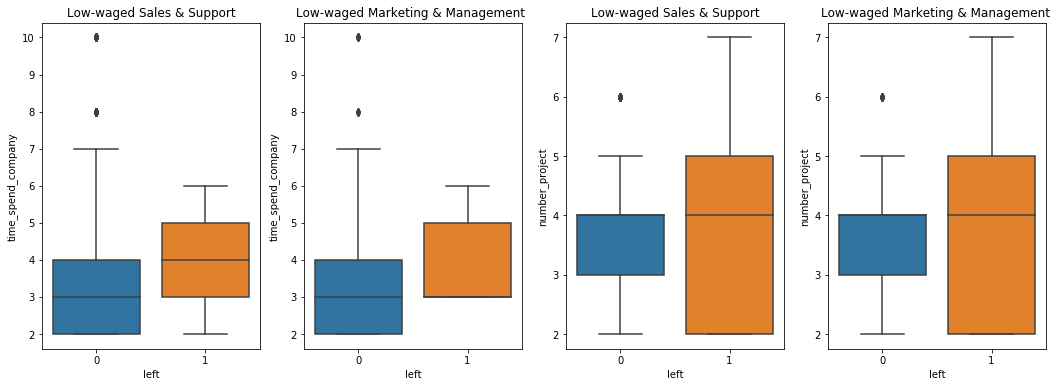

In [19]:
fig, ax = plt.subplots(1,4, figsize=(18,6))

ax[0].title.set_text('Low-waged Sales & Support')
sns.boxplot(x = low_ss['left'], y = low_ss['time_spend_company'], ax = ax[0])

ax[1].title.set_text('Low-waged Marketing & Management ')
sns.boxplot(x = low_mm['left'], y = low_mm['time_spend_company'], ax = ax[1])

ax[2].title.set_text('Low-waged Sales & Support')
sns.boxplot(x = low_ss['left'], y = low_ss['number_project'], ax = ax[2])

ax[3].title.set_text('Low-waged Marketing & Management ')
sns.boxplot(x = low_mm['left'], y = low_mm['number_project'], ax = ax[3])

plt.show()

А вот это уже интереснее:
1. Среди отделов свысокой текучкой, больше увольнений приходится на сотрудников с большим стажем
2. Но в тоже время больше увольняются сотрудники, перегруженные работой (если считать что сложность проектов у всех одинаковая и количество проектов это не накопленное значение)

Т.о. видим, что в компании с увеличением стажа сотрудников растет его загруженность, что может свидетельсовать о плохом управлении проетами и перегрузкой опытных сотрудников.

### Выводы
1. Есть несколько причин увольнения сотрудников:
    - Загруженность работой, растущаяя со стажем
    - Снижение удовлетворенностью от работы. Может быть обусловлена управлением персоналом.
2. Данные довольно легко кластеризуются. Если обучить  на них какой-нибудь алгоритм кластеризации, можно будет получить довольно точную модель предсказания увольнения сотрудника и разработать план мероприятий по его удержанию. Наибольщее внимание стоит уделить отделам с высокой "текучкой" кадров.
3. Есть альтернативная гипотеза о кардинальных изменениях в топ-менеджменте компании, что негативно повлияло на мотивацию сотрудников. Или например, руководство решило резко сократить штат part-time сотрудников, что перегрузило работой остальных. Но для проверки этой гипотезы нужен глубокий анализ и применение более слодных алгоритмов.   